# Import data

In [1]:
import pandas as pd

data = pd.read_csv('Data/bbni_258_01012019_11112024_detikfinance_true_false_ds-14112024-101813.csv')


In [2]:
# # set max row to display
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)

data

,title,category,publish_date,article_url
0,Berapa Harga Saham BBCA Hari Ini?,detikFinance,"Senin, 11 Nov 2024 12:45 WIB",https://finance.detik.com/bursa-dan-valas/d-76...
1,Dua Mata Pisau Penghapusan Utang UMKM,detikFinance,"Jumat, 08 Nov 2024 15:15 WIB",https://finance.detik.com/berita-ekonomi-bisni...
2,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Sa...",detikFinance,"Rabu, 06 Nov 2024 13:44 WIB",https://finance.detik.com/bursa-dan-valas/d-76...
3,IHSG Hari Ini Diramal Bergerak Fluktuatif,detikFinance,"Selasa, 05 Nov 2024 08:13 WIB",https://finance.detik.com/bursa-dan-valas/d-76...
4,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO ...",detikFinance,"Selasa, 29 Okt 2024 08:30 WIB",https://finance.detik.com/bursa-dan-valas/d-76...
...,...,...,...,...
253,"Putar Balik, IHSG Ditutup Negatif ke 6.419",detikFinance,"Rabu, 13 Feb 2019 16:43 WIB",https://finance.detik.com/bursa-dan-valas/d-44...
254,"Perdagangan Sepi, IHSG Naik Tipis ke 6.438",detikFinance,"Rabu, 13 Feb 2019 12:31 WIB",https://finance.detik.com/bursa-dan-valas/d-44...
255,"Seragam dengan Bursa Asia, IHSG Bertahan di Zo...",detikFinance,"Senin, 21 Jan 2019 12:37 WIB",https://finance.detik.com/bursa-dan-valas/d-43...
256,"Asing Beli Bersih Rp 2 T, IHSG Bertahan di 6.425",detikFinance,"Rabu, 16 Jan 2019 16:55 WIB",https://finance.detik.com/bursa-dan-valas/d-43...


In [3]:
# buat plot dari data publish_date every week
import matplotlib.pyplot as plt


In [4]:
# Define a mapping for Indonesian weekdays and months to English equivalents
indonesian_weekdays = {
    "Senin": "Monday", "Selasa": "Tuesday", "Rabu": "Wednesday",
    "Kamis": "Thursday", "Jumat": "Friday", "Sabtu": "Saturday", "Minggu": "Sunday"
}
indonesian_months = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", "Mei": "May",
    "Jun": "Jun", "Jul": "Jul", "Agu": "Aug", "Sep": "Sep", "Okt": "Oct",
    "Nov": "Nov", "Des": "Dec"
}

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    data['publish_date'] = data['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    data['publish_date'] = data['publish_date'].str.replace(indo_month, eng_month, regex=False)


In [5]:

# Convert publish_date to datetime
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%A, %d %b %Y %H:%M WIB', errors='coerce')


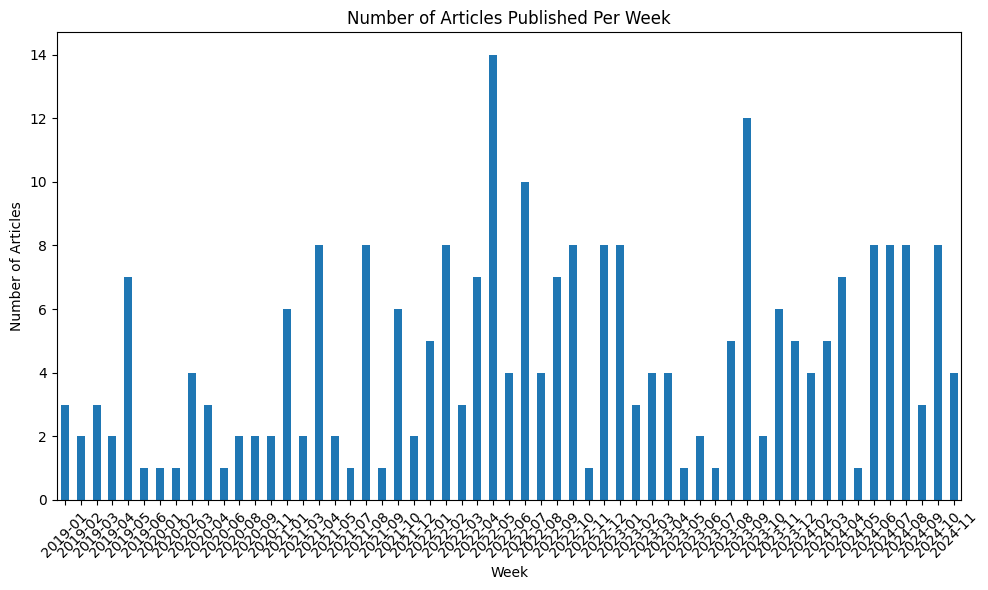

In [6]:

# Group by week and count the articles
weekly_counts = data['publish_date'].dt.to_period('M').value_counts().sort_index()

# Plotting weekly data
plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='bar')
plt.title("Number of Articles Published Per Week")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
mei_2022_data = data[(data['publish_date'].dt.year == 2024) & (data['publish_date'].dt.month == 6)]
pd.set_option('display.max_colwidth', None)

mei_2022_data['title']

31                          Pasar Optimis, IHSG Masih Betah di Zona Hijau
32                   Usai Libur Panjang, IHSG Hari Ini Diprediksi Melemah
33       Top! Jumlah Investor BBRI Naik Signifikan dalam 4 Bulan Terakhir
34    Ada 'Diskon' Harga Saham, Jumlah Investor BBRI Tembus Setengah Juta
35                     IHSG Dibuka di Zona Hijau, Diramal Mantul Hari Ini
36                   IHSG Rabu Pagi Bergerak ke Zona Merah di Level 6.851
37                    IHSG Pagi Ini Bergerak ke Zona Merah di Level 6.907
38                                  Awal Pekan IHSG Dibuka ke Level 6.897
Name: title, dtype: object

# Translate

In [8]:
data.drop(columns=['article_url'], inplace=True)

In [9]:
data

,title,category,publish_date
0,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00
1,Dua Mata Pisau Penghapusan Utang UMKM,detikFinance,2024-11-08 15:15:00
2,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Saham Perbankan",detikFinance,2024-11-06 13:44:00
3,IHSG Hari Ini Diramal Bergerak Fluktuatif,detikFinance,2024-11-05 08:13:00
4,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO Makin Likuid?",detikFinance,2024-10-29 08:30:00
...,...,...,...
253,"Putar Balik, IHSG Ditutup Negatif ke 6.419",detikFinance,2019-02-13 16:43:00
254,"Perdagangan Sepi, IHSG Naik Tipis ke 6.438",detikFinance,2019-02-13 12:31:00
255,"Seragam dengan Bursa Asia, IHSG Bertahan di Zona Hijau",detikFinance,2019-01-21 12:37:00
256,"Asing Beli Bersih Rp 2 T, IHSG Bertahan di 6.425",detikFinance,2019-01-16 16:55:00


In [ ]:
# %pip install deep_translator

In [11]:
from deep_translator import GoogleTranslator
import pandas as pd

df = data.copy()

# Penerjemah Deep Translator
translator = GoogleTranslator(source='id', target='en')

# Menerjemahkan Kolom
df['title_en'] = df['title'].apply(lambda x: translator.translate(x))


In [12]:
df

,title,category,publish_date,title_en
0,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00,What is the Price of BBCA Shares Today?
1,Dua Mata Pisau Penghapusan Utang UMKM,detikFinance,2024-11-08 15:15:00,Double-edged Sword of MSME Debt Elimination
2,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Saham Perbankan",detikFinance,2024-11-06 13:44:00,"Prabowo Writes Off MSME Debt, Here's the Effect on Banking Stocks"
3,IHSG Hari Ini Diramal Bergerak Fluktuatif,detikFinance,2024-11-05 08:13:00,IHSG Today Predicted to Move Fluctuatively
4,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO Makin Likuid?",detikFinance,2024-10-29 08:30:00,"Entering the List of 45 Pre-opening Stocks, Are GOTO Stocks Increasingly Liquid?"
...,...,...,...,...
253,"Putar Balik, IHSG Ditutup Negatif ke 6.419",detikFinance,2019-02-13 16:43:00,"U-Turn, IHSG Closes Negative at 6,419"
254,"Perdagangan Sepi, IHSG Naik Tipis ke 6.438",detikFinance,2019-02-13 12:31:00,"Quiet Trading, IHSG Increases Slightly to 6,438"
255,"Seragam dengan Bursa Asia, IHSG Bertahan di Zona Hijau",detikFinance,2019-01-21 12:37:00,"In line with Asian Stock Exchanges, IHSG Remains in the Green Zone"
256,"Asing Beli Bersih Rp 2 T, IHSG Bertahan di 6.425",detikFinance,2019-01-16 16:55:00,"Foreign Net Buy of Rp 2 T, IHSG Holds at 6,425"


# Processing

In [13]:
# stopword removal title_en
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))

df['title_en_stopwords_removed'] = df['title_en'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [15]:
df

,title,category,publish_date,title_en,title_en_stopwords_removed
0,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00,What is the Price of BBCA Shares Today?,Price BBCA Shares Today ?
1,Dua Mata Pisau Penghapusan Utang UMKM,detikFinance,2024-11-08 15:15:00,Double-edged Sword of MSME Debt Elimination,Double-edged Sword MSME Debt Elimination
2,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Saham Perbankan",detikFinance,2024-11-06 13:44:00,"Prabowo Writes Off MSME Debt, Here's the Effect on Banking Stocks","Prabowo Writes MSME Debt , 's Effect Banking Stocks"
3,IHSG Hari Ini Diramal Bergerak Fluktuatif,detikFinance,2024-11-05 08:13:00,IHSG Today Predicted to Move Fluctuatively,IHSG Today Predicted Move Fluctuatively
4,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO Makin Likuid?",detikFinance,2024-10-29 08:30:00,"Entering the List of 45 Pre-opening Stocks, Are GOTO Stocks Increasingly Liquid?","Entering List 45 Pre-opening Stocks , GOTO Stocks Increasingly Liquid ?"
...,...,...,...,...,...
253,"Putar Balik, IHSG Ditutup Negatif ke 6.419",detikFinance,2019-02-13 16:43:00,"U-Turn, IHSG Closes Negative at 6,419","U-Turn , IHSG Closes Negative 6,419"
254,"Perdagangan Sepi, IHSG Naik Tipis ke 6.438",detikFinance,2019-02-13 12:31:00,"Quiet Trading, IHSG Increases Slightly to 6,438","Quiet Trading , IHSG Increases Slightly 6,438"
255,"Seragam dengan Bursa Asia, IHSG Bertahan di Zona Hijau",detikFinance,2019-01-21 12:37:00,"In line with Asian Stock Exchanges, IHSG Remains in the Green Zone","line Asian Stock Exchanges , IHSG Remains Green Zone"
256,"Asing Beli Bersih Rp 2 T, IHSG Bertahan di 6.425",detikFinance,2019-01-16 16:55:00,"Foreign Net Buy of Rp 2 T, IHSG Holds at 6,425","Foreign Net Buy Rp 2 , IHSG Holds 6,425"


# Sentiment Analisys

In [17]:
#  use siebert/sentiment-roberta-large-english model from huggingface to sentiment analysis

from transformers import pipeline

sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

c:\Users\thari\anaconda3\envs\ml\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\thari\.cache\huggingface\hub\models--siebert--sentiment-roberta-large-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [19]:
# Sentiment Analysis
df['sentiment'] = df['title_en_stopwords_removed'].apply(lambda x: sentiment_analysis(x)[0]['label'])

df

,title,category,publish_date,title_en,title_en_stopwords_removed,sentiment
0,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00,What is the Price of BBCA Shares Today?,Price BBCA Shares Today ?,NEGATIVE
1,Dua Mata Pisau Penghapusan Utang UMKM,detikFinance,2024-11-08 15:15:00,Double-edged Sword of MSME Debt Elimination,Double-edged Sword MSME Debt Elimination,NEGATIVE
2,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Saham Perbankan",detikFinance,2024-11-06 13:44:00,"Prabowo Writes Off MSME Debt, Here's the Effect on Banking Stocks","Prabowo Writes MSME Debt , 's Effect Banking Stocks",NEGATIVE
3,IHSG Hari Ini Diramal Bergerak Fluktuatif,detikFinance,2024-11-05 08:13:00,IHSG Today Predicted to Move Fluctuatively,IHSG Today Predicted Move Fluctuatively,POSITIVE
4,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO Makin Likuid?",detikFinance,2024-10-29 08:30:00,"Entering the List of 45 Pre-opening Stocks, Are GOTO Stocks Increasingly Liquid?","Entering List 45 Pre-opening Stocks , GOTO Stocks Increasingly Liquid ?",POSITIVE
...,...,...,...,...,...,...
253,"Putar Balik, IHSG Ditutup Negatif ke 6.419",detikFinance,2019-02-13 16:43:00,"U-Turn, IHSG Closes Negative at 6,419","U-Turn , IHSG Closes Negative 6,419",NEGATIVE
254,"Perdagangan Sepi, IHSG Naik Tipis ke 6.438",detikFinance,2019-02-13 12:31:00,"Quiet Trading, IHSG Increases Slightly to 6,438","Quiet Trading , IHSG Increases Slightly 6,438",POSITIVE
255,"Seragam dengan Bursa Asia, IHSG Bertahan di Zona Hijau",detikFinance,2019-01-21 12:37:00,"In line with Asian Stock Exchanges, IHSG Remains in the Green Zone","line Asian Stock Exchanges , IHSG Remains Green Zone",POSITIVE
256,"Asing Beli Bersih Rp 2 T, IHSG Bertahan di 6.425",detikFinance,2019-01-16 16:55:00,"Foreign Net Buy of Rp 2 T, IHSG Holds at 6,425","Foreign Net Buy Rp 2 , IHSG Holds 6,425",POSITIVE


In [20]:
df['sentiment'].value_counts()

sentiment
POSITIVE    192
NEGATIVE     66
Name: count, dtype: int64

In [21]:
df.to_csv('Data/bbni sentiment analysis.csv', index=False)